### 1] TM_CCOEFF : (brightness change doesn't mstter )
#### calculates correlation coefficient 
### 2] TM_CCOEFF_NORMED :
#### it also calculates correlation coefficent but also normalizes it in [-1,1]
### 3] TM_CCORR : (sensitive to brightness change )
#### calculates cross correlation coefficient 
### 4] TM_CCORR_NORMED :
#### it also calculates cross correlation coefficent but also normalizes it in [0,1]
### 5] TM_SQDIFF : ( useful when brightness of both is same)
#### calculates Sum of Squared Differences
### 6] TM_SQDIFF_NORMED :
#### it also calculates Sum of Squared Differences but also normalizes it in [0,1]

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

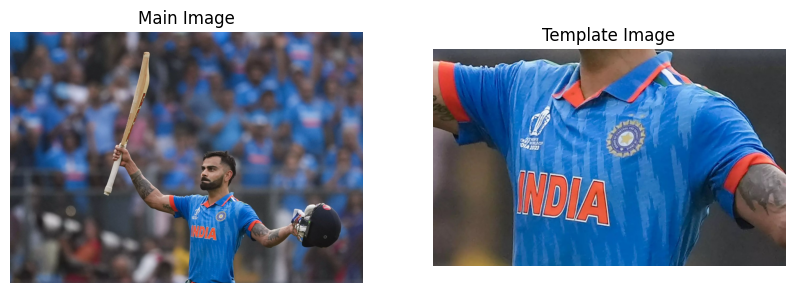

In [75]:
img = cv2.imread('saved\\virat1.jpg',-1)
template = cv2.imread('saved\\virat2.jpg',-1)

# print(img , template)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(10,10))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
template1 = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Main Image')

ax[1].imshow(template1)
ax[1].axis('off')
ax[1].set_title('Template Image')
plt.show()

-555817856.0 1421192576.0 (593, 123) (2146, 2179)


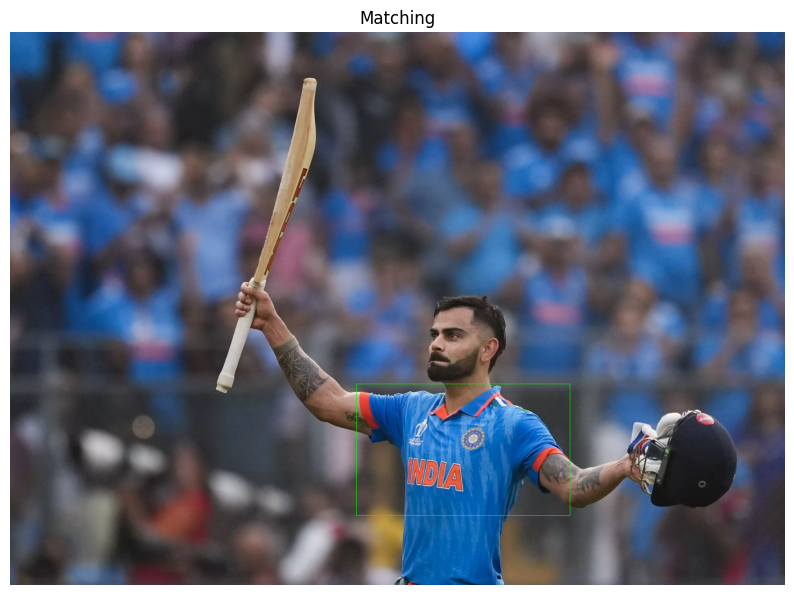

In [77]:
result = cv2.matchTemplate(img_gray,temp_gray,cv2.TM_CCOEFF) 
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
print(min_val,max_val,min_loc,max_loc)
top_left = max_loc
h,w = temp_gray.shape
bottom_right = (top_left[0]+w, top_left[1]+h)
cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)

resized_img = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
# resized_img = cv2.resize(img,(1000,800))

resized_img_color = cv2.cvtColor(resized_img,cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(resized_img_color)
ax.axis('off')
ax.set_title('Matching')
plt.show()

# cv2.imshow('Matching',resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#
#
# min_val, max_val, min_loc, max_loc
#
#### 1] -555817856.0 , 1421192576.0 , (593, 123) (2146, 2179)
#### 2] -0.3532067537307739 , 0.995976984500885 , (529, 98) (2146, 2179)
#### 3] 6511073280.0 , 10583054336.0 , (0, 1943) (578, 744)     ( Wrong op )
#### 4] 0.78643399477005 , 0.999436616897583 , (636, 117) (2146, 2179)
#### 5] 11542528.0 ,  4319281152.0 , (2146, 2179) (632, 130)     ( Wrong op )
#### 6] 0.0011273935670033097 , 0.4338019788265228 ,  (2146, 2179) (3478, 2504)     ( Wrong op )

#
#
# -------------------------------------------------------------------------------------------------
#
#
#
#
#
#
### For Multiple Templates


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

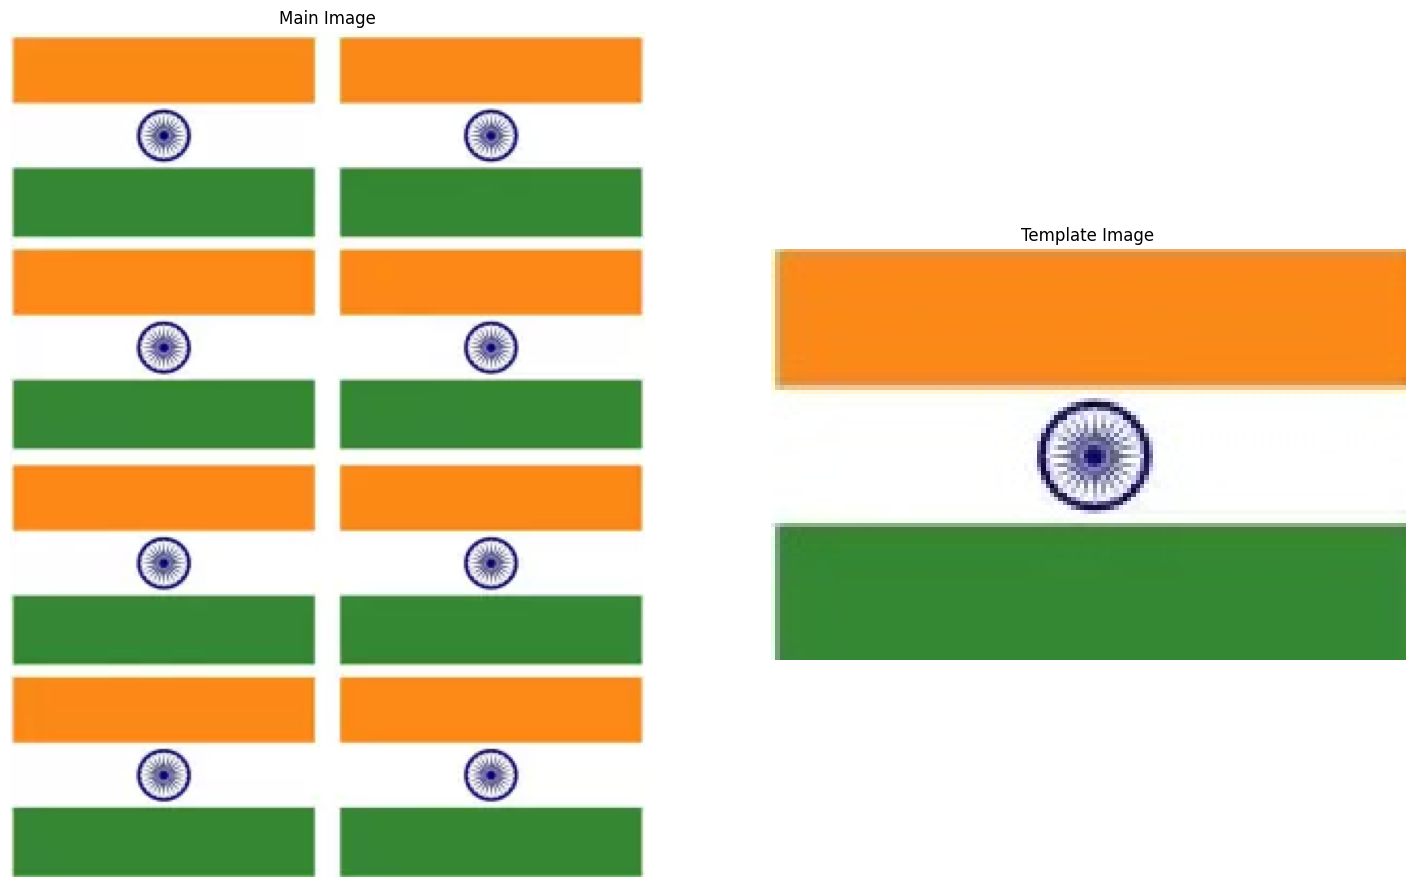

In [3]:
img = cv2.imread('saved\\india1.jpg',-1)
template = cv2.imread('saved\\india2.jpg',-1)

# print(img , template)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(18,18))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
template1 = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Main Image')

ax[1].imshow(template1)
ax[1].axis('off')
ax[1].set_title('Template Image')

plt.show()

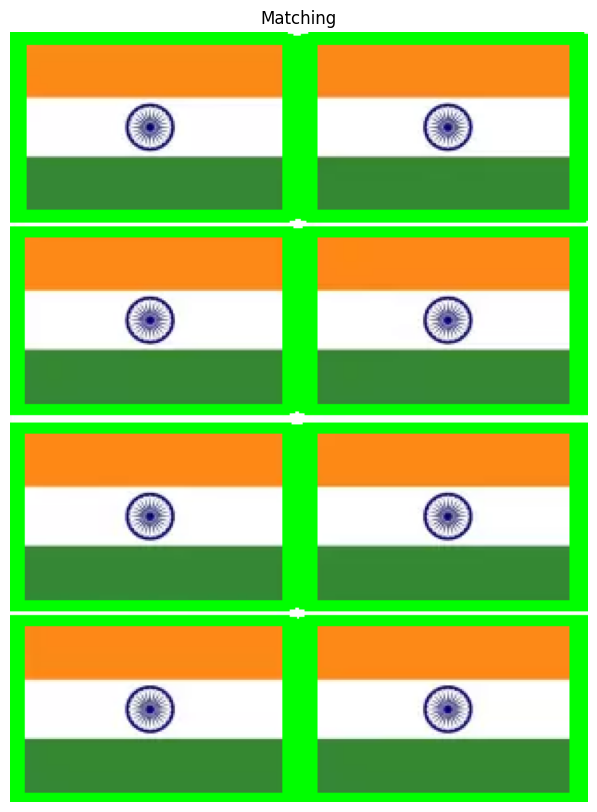

In [5]:
w, h = temp_gray.shape[::-1]

# TM_CCOEFF , TM_CCOEFF_NORMED , TM_CCORR , TM_CCORR_NORMED , TM_SQDIFF , TM_SQDIFF_NORMED 

res = cv2.matchTemplate(img_gray,temp_gray,cv2.TM_CCOEFF_NORMED)
# print(res)
threshold = 0.85
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,0), 1)
 
# cv2.imwrite('Recordings/01.jpg',img) # TO SAVE THE IMAGE -> RGB

resized_img = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
# resized_img = cv2.resize(img,(1000,800))

# resized_img_color = cv2.cvtColor(resized_img,cv2.COLOR_BGR2RGB)

img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img1)
ax.axis('off')
ax.set_title('Matching')
plt.show()

# cv2.imshow('Matching',resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# BACKGROUND IMAGE REMOVED COMPARING


In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt

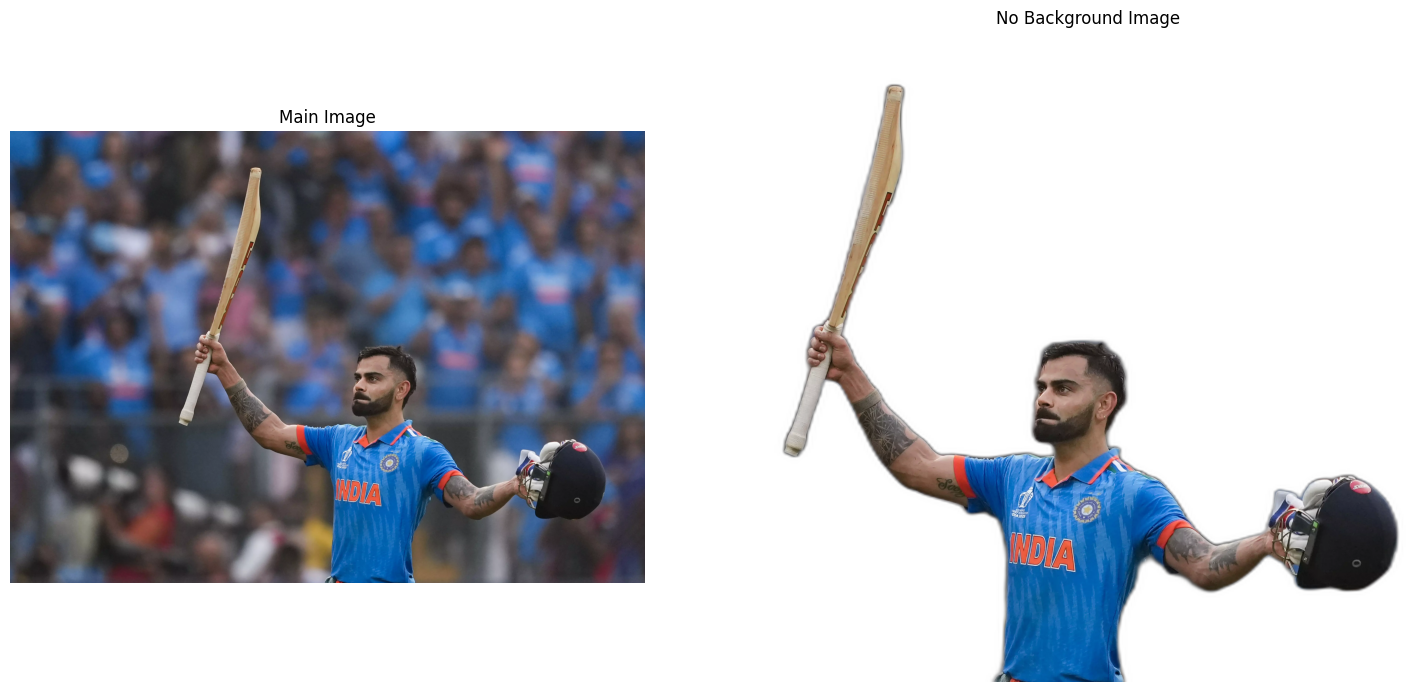

In [3]:
img = cv2.imread('saved\\virat1.jpg',-1)
template = cv2.imread('saved\\virat1_op.png',-1)

# print(img , template)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

fig,ax = plt.subplots(1,2,figsize=(18,18))
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
template1 = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Main Image')

ax[1].imshow(template1)
ax[1].axis('off')
ax[1].set_title('No Background Image')

plt.show()

## FlannBasedMatcher => kNN

C:\Users\NEEL\AppData\Local\Temp\ipykernel_4484\3538673198.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  src_rects = np.int0(cv2.boxPoints(cv2.minAreaRect(src_pts)))
C:\Users\NEEL\AppData\Local\Temp\ipykernel_4484\3538673198.py:24: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  dst_rects = np.int0(cv2.boxPoints(cv2.minAreaRect(dst_pts)))


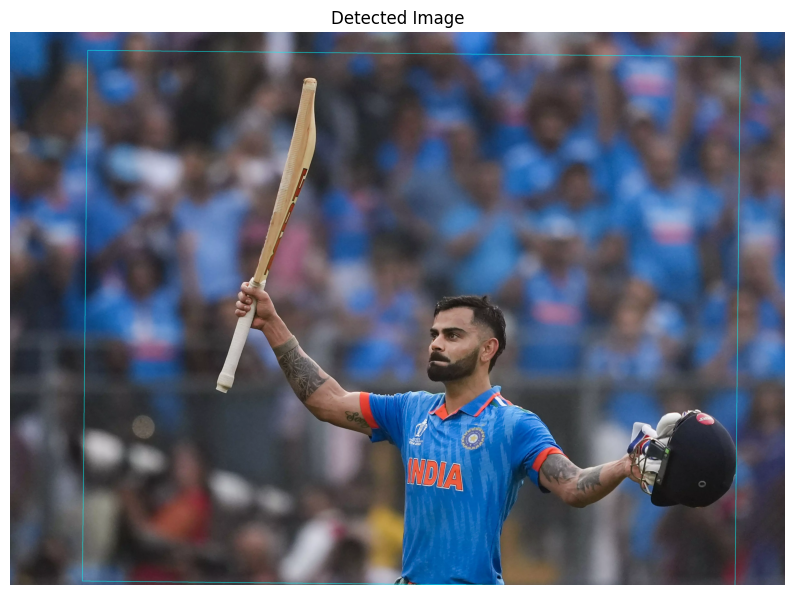

In [9]:
sift = cv2.SIFT_create()

kp1,des1 = sift.detectAndCompute(img_gray,None)
kp2,des2 = sift.detectAndCompute(temp_gray,None)

flann = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 5}, {'checks': 50})

matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img, kp1, template, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Get coordinates of keypoints from good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Compute the bounding boxes for the keypoints
src_rects = np.int0(cv2.boxPoints(cv2.minAreaRect(src_pts)))
dst_rects = np.int0(cv2.boxPoints(cv2.minAreaRect(dst_pts)))

# Draw rectangles on the images
img_with_rects = cv2.drawContours(img.copy(), [src_rects], -1, (250,250,0), 2)
# Display the result

extra = cv2.cvtColor(img_with_rects,cv2.COLOR_BGR2RGB)
# print(img_with_rects.shape , extra.shape)

fig,ax = plt.subplots(figsize=(10,8))
ax.imshow(extra)
ax.set_title('Detected Image')
ax.axis('off')

plt.show()
